In [4]:
# 读取保存好的 gate 层的激活输出
import torch
mlp_dict = torch.load('mlp_dict.pt', map_location='cpu')

In [1]:
import sys
sys.path.append('/home/shaoyuantian/program/MixedPrecision/fake_quant')
from hadamard_utils import random_hadamard_matrix
had_matrix = random_hadamard_matrix(11008, "cuda:0")

In [2]:
import transformers
from transformers.activations import ACT2FN 
model = transformers.AutoModelForCausalLM.from_pretrained('meta-llama/Llama-2-7b-hf', device_map='cpu')
act_fn = ACT2FN[model.config.hidden_act]

/home/shaoyuantian/anaconda3/envs/dartquant/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_3d_matrix(org_w,
                   title='3D Matrix Visualization',
                   xlabel='input',
                   ylabel='output',
                   zlabel='Intensity',
                   cmap='coolwarm'):
    """
    将输入的矩阵进行 3D 可视化。

    参数:
    org_w: 2D numpy 数组 或 torch.Tensor，表示要可视化的矩阵
    xlabel: X 轴的标签
    ylabel: Y 轴的标签
    zlabel: Z 轴的标签
    cmap: 颜色映射，默认 'coolwarm'
    """
    # 如果输入是 torch.Tensor，转换为 numpy.ndarray
    if isinstance(org_w, torch.Tensor):
        org_w = org_w.numpy()

    # 确保输入是二维矩阵
    if not isinstance(org_w, np.ndarray) or org_w.ndim != 2:
        raise ValueError("org_w 必须是一个二维矩阵（numpy array 或 torch tensor）。")

    M, N = org_w.shape
    X = np.arange(N)
    Y = np.arange(M)
    X, Y = np.meshgrid(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 绘制 3D 表面图
    ax.plot_surface(X, Y, org_w, cmap=cmap)

    # 设置坐标轴标签
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.title.set_text(f'{title}')

    plt.show()

tensor(8.3049e-05, device='cuda:0', dtype=torch.float64)


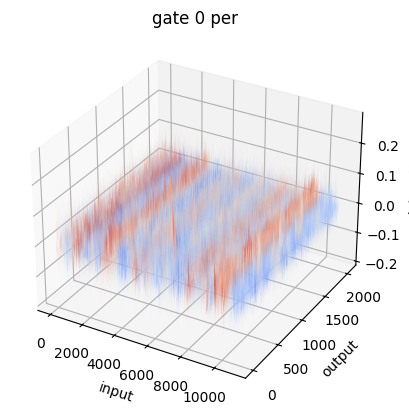

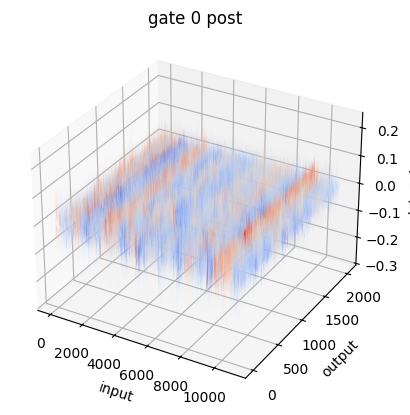

tensor(0.0011, device='cuda:0', dtype=torch.float64)


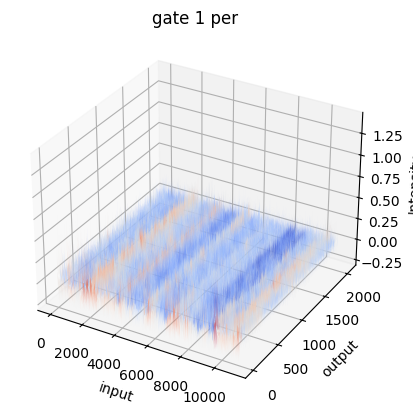

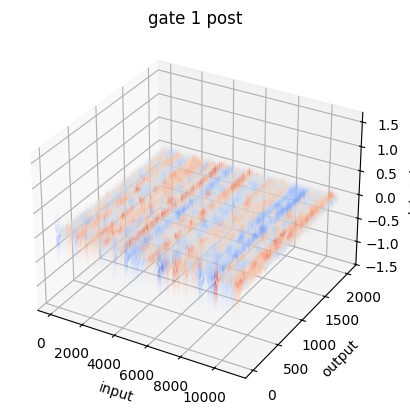

tensor(0.0005, device='cuda:0', dtype=torch.float64)


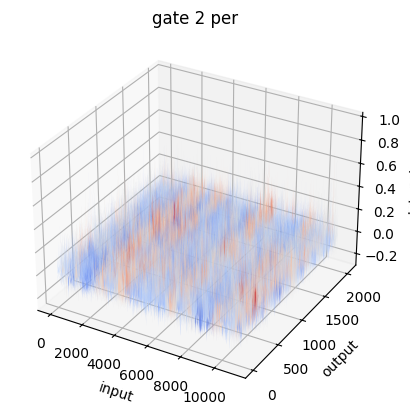

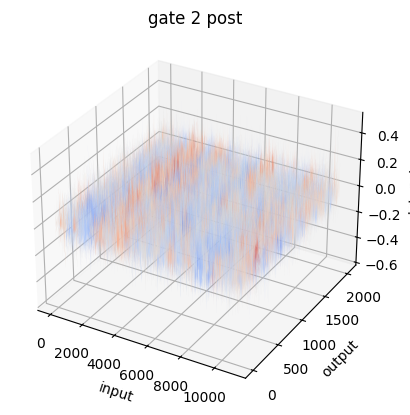

tensor(0.0010, device='cuda:0', dtype=torch.float64)


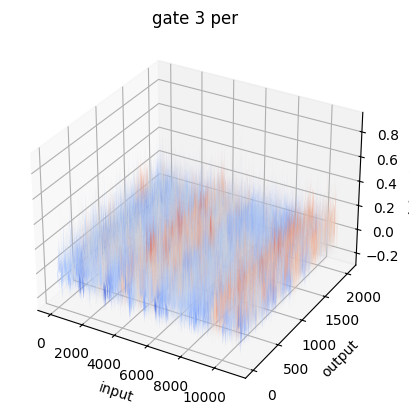

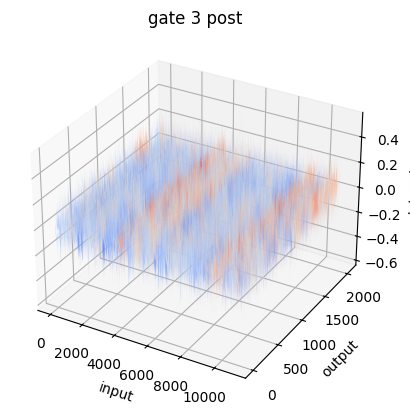

tensor(0.0028, device='cuda:0', dtype=torch.float64)


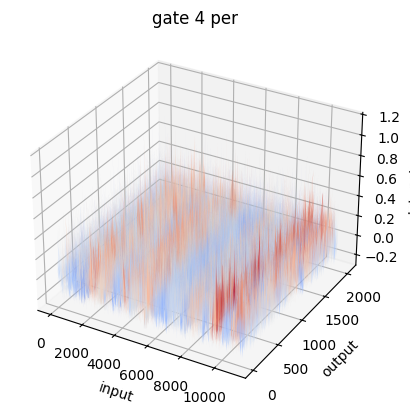

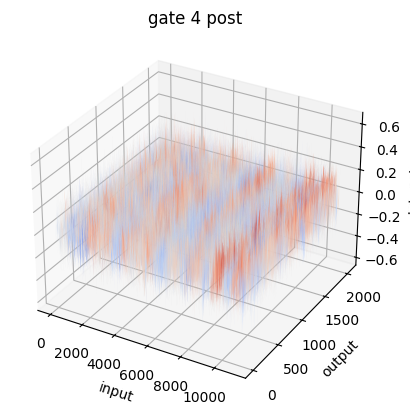

tensor(0.0041, device='cuda:0', dtype=torch.float64)


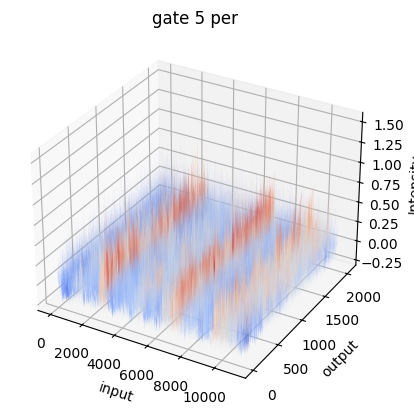

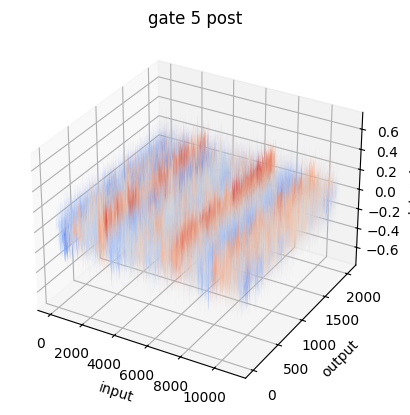

tensor(0.0080, device='cuda:0', dtype=torch.float64)


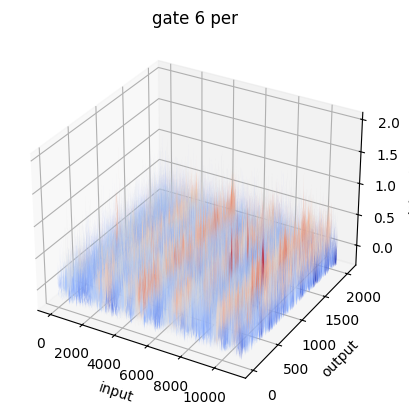

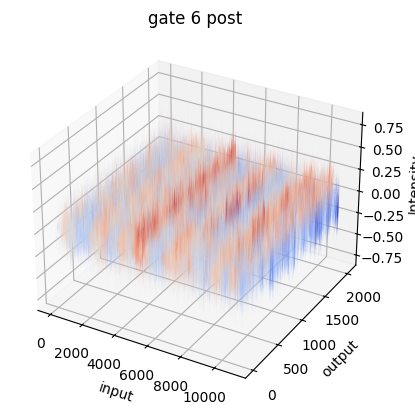

tensor(0.0111, device='cuda:0', dtype=torch.float64)


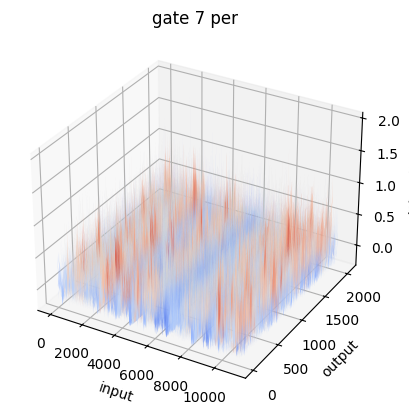

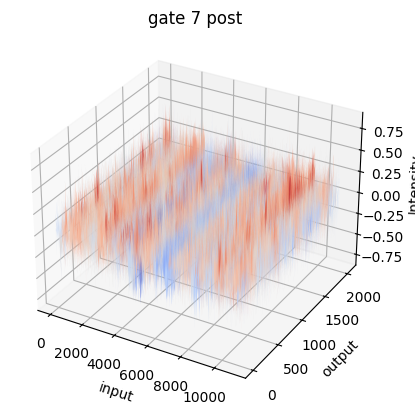

tensor(0.0121, device='cuda:0', dtype=torch.float64)


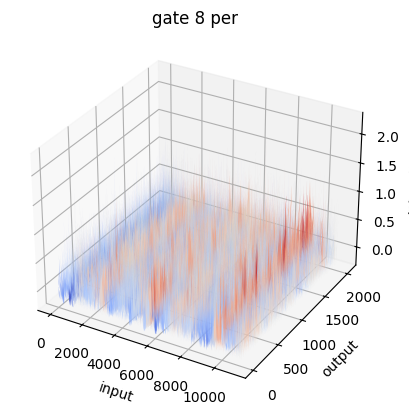

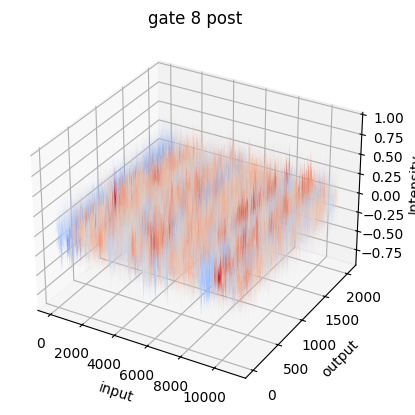

tensor(0.0140, device='cuda:0', dtype=torch.float64)


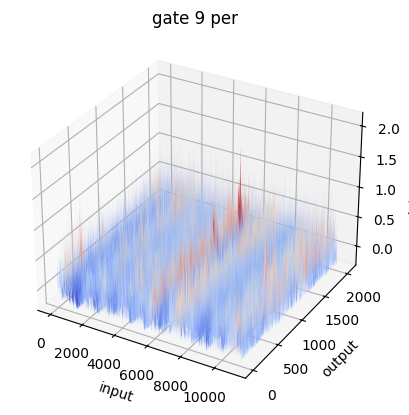

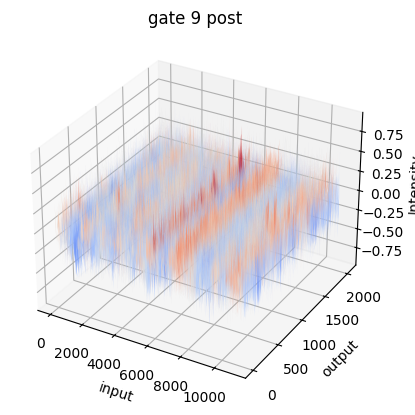

tensor(0.0159, device='cuda:0', dtype=torch.float64)


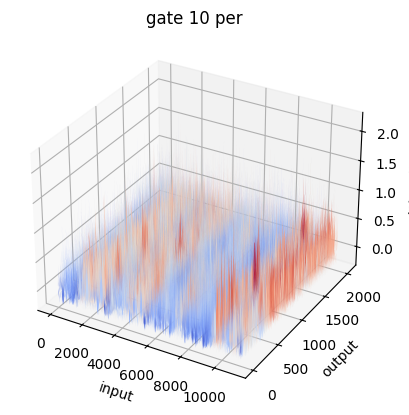

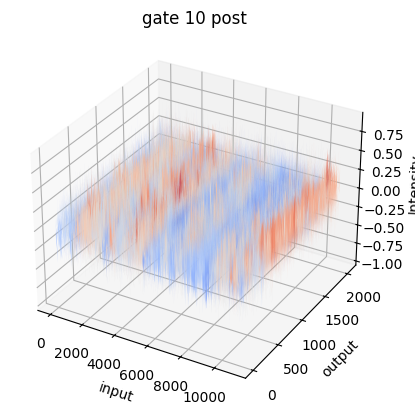

: 

In [ ]:
idx = 0
for k, v in mlp_dict.items():
    if 'gate' in k:
        per_act = act_fn(v.squeeze().to(device='cuda:0', dtype=torch.float64) @ had_matrix)
        post_act = act_fn(v.squeeze().to(device='cuda:0', dtype=torch.float64)) @ had_matrix
        print(torch.nn.functional.mse_loss(per_act, post_act))
        plot_3d_matrix(per_act.cpu().numpy(), title=f'gate {idx} per', xlabel='input', ylabel='output', zlabel='Intensity')
        plot_3d_matrix(post_act.cpu().numpy(), title=f'gate {idx} post', xlabel='input', ylabel='output', zlabel='Intensity')
        idx += 1
        if idx > 10:
            break